In [10]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
directory_path = ["Result/201903", "Result/201906", "Result/201909", "Result/201912"]
result = []
for path in directory_path:
    csv_files = glob.glob(os.path.join(path, "*_all_*.csv"))
    for file in csv_files:
        df = pd.read_csv(file)
        df = df[df['county'].isin(['Sacramento County', 'Amador County'])]
        pd_county = df.groupby(['county'])['pd'].agg('sum')
        c_vec_county = df.groupby(['county'])['c_vec'].agg('sum')
        result.append((c_vec_county/pd_county).to_list())

0.4111613276132268
0.01152843185306642


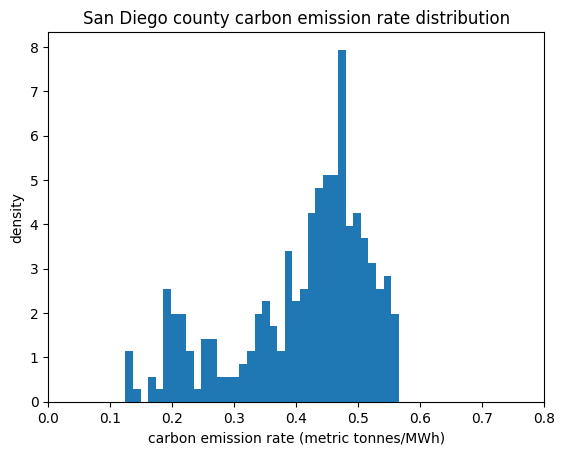

In [11]:
sa_county = []
for i in range(len(result)):
    sa_county.append(result[i][1])
print(np.mean(sa_county))
print(np.var(sa_county))
plt.hist(sa_county, bins=36, density=True, stacked=True)
plt.xticks(np.arange(0, 0.9, 0.1))
plt.title('San Diego county carbon emission rate distribution')
plt.xlabel('carbon emission rate (metric tonnes/MWh)')
plt.ylabel('density')
plt.show()

0.5913178540780893
0.06383689115654897


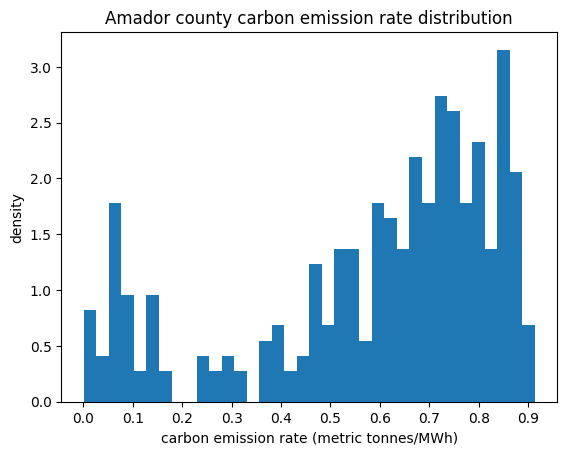

In [12]:
ama_county = []
for i in range(len(result)):
    ama_county.append(result[i][0])
print(np.mean(ama_county))
print(np.var(ama_county))
plt.hist(ama_county, bins=36, density=True, stacked=True)
xmin, xmax = min(ama_county), max(ama_county)  # Get range of values
plt.xticks(np.arange(round(xmin, 1), round(xmax, 1) + 0.1, 0.1))
plt.title('Amador county carbon emission rate distribution')
plt.xlabel('carbon emission rate (metric tonnes/MWh)')
plt.ylabel('density')
plt.show()